# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

RR**COMPLETA EN ESTA CELDA TU RESPUESTA**

Datos que entreguen caracteristicas de la vivienda como m2, materiales, cantidad de habitaciones. Como tambien datos del entorno como el barrio, zona urbana. Tambien datos que nos permitan tener alguna idea del precio por metro cuadraro que se este ofertando por viviendas de cierta carteristicas, en el caso que no contemos con precios.

Estos datos son necesarios para poder tener al menos un relacion entre el precio de un inmuble y las caracteristicas que lo componen, considerando que el mercado inmobiliario ya cuenta con ciertos parametros que nos pueden ayudar entender esta relacion.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
#importamos algunas librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
sns.set()

#scipy nos ayuda con algunos estadisticos
import scipy as sp
from scipy import stats

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
df = pd.read_csv(r'DS_Proyecto_01_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
df.tail()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [5]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: 
¿Cuántos tipos de propiedad hay publicados según este dataset?
¿Cuántos instancias por cada tipo de propiedad hay en el dataset? 

Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. 
**Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
#podemos tener una prima vista del tipo de propiedades
df['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [7]:
#podemos saber cuantas hay de cada tipo utilizando una tabla
df.groupby(['property_type'])['property_type'].agg('count').sort_values(ascending=False)

property_type
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

<AxesSubplot:xlabel='property_type'>

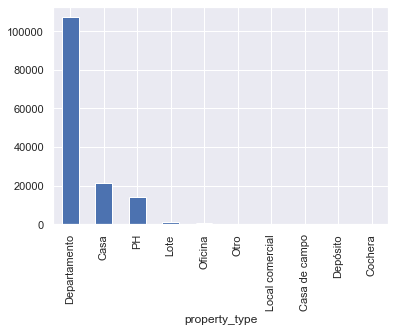

In [8]:
#Podemos combinar la tabla con un grafico y ordenarlo de mayor a menor
df.groupby(['property_type'])['property_type'].agg('count').sort_values(ascending=False).plot(kind='bar')

De un total de 146.660 datos de vivienddas podemos observar que mayoria corresponde a departamentos seguido de casa y PH.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

<AxesSubplot:ylabel='l2'>

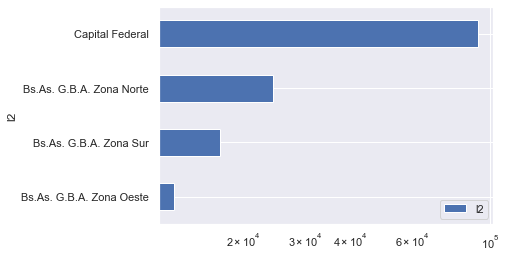

In [9]:
#Podemos crear graficos por separado par entender los datos reutilizando el groupby
df.groupby(['l2'])['l2'].agg('count').sort_values(ascending=True).plot(kind='barh',legend=True, logx = True)

<AxesSubplot:xlabel='l3'>

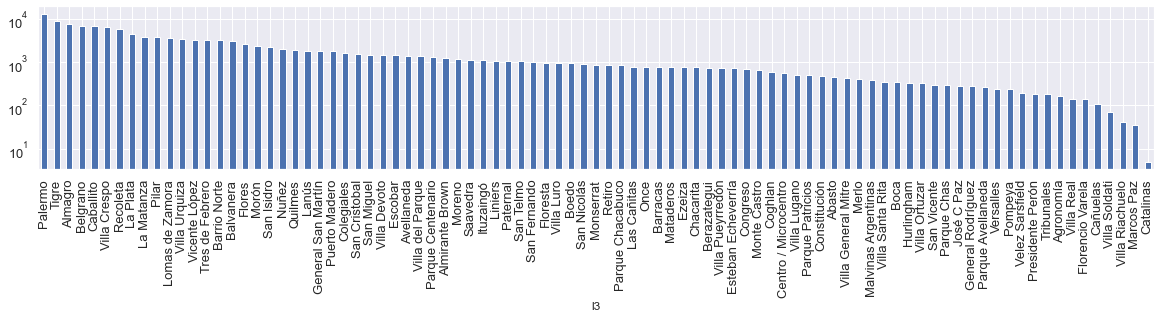

In [10]:
#podemos utilizar una escala algoritmica para dar un zoom ademas de estableces el tamaño del grafico para una mejor visializacion
df.groupby(['l3'])['l3'].agg('count').sort_values(ascending= False).plot(kind='bar',logy = True ,figsize=(20,3),fontsize= 13)

<AxesSubplot:>

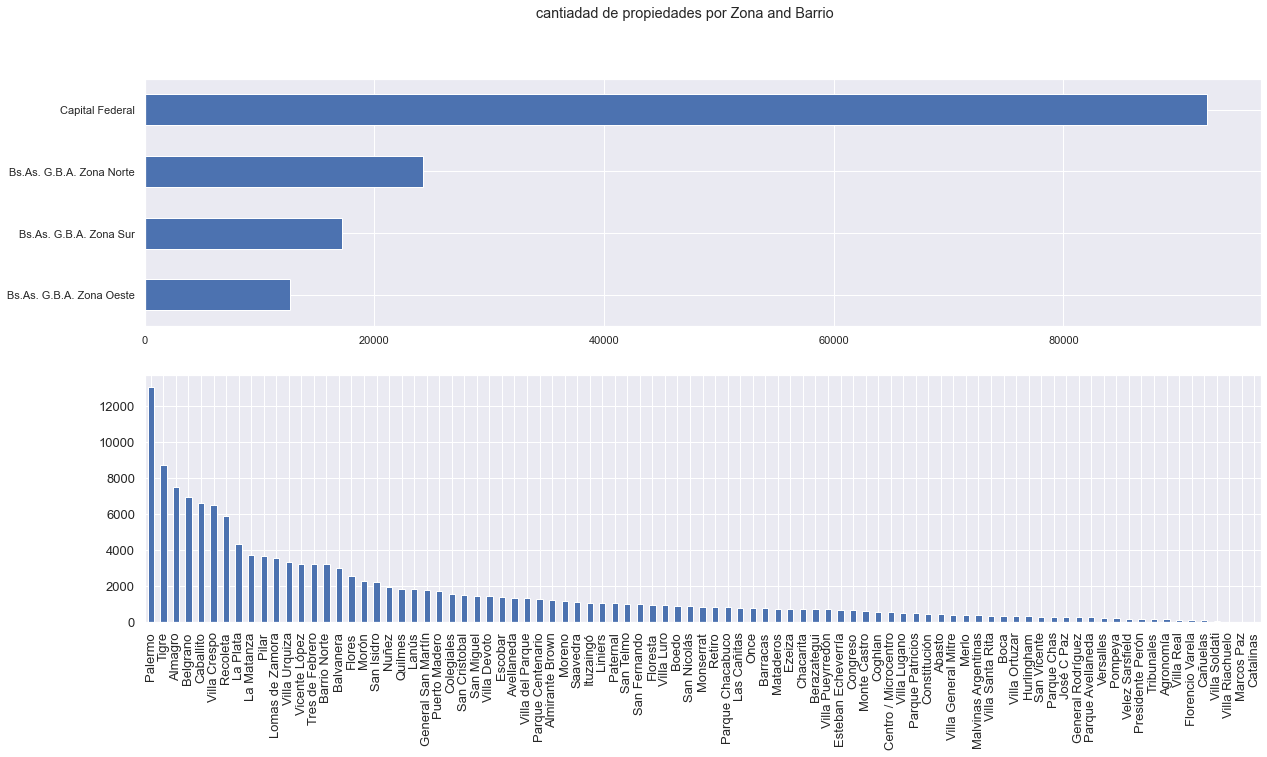

In [11]:
#Podemos utilizar subplot para mostrar ambos graficos juntos y configurar sus estilo en gerenal y por cada uno
fig, axarr = plt.subplots(2,1,figsize=(20, 10))
fig.suptitle('cantiadad de propiedades por Zona and Barrio')

df['l2'].value_counts().sort_values(ascending= True).plot.barh(
    ax=axarr[0]
)
df['l3'].value_counts().plot.bar(
    ax=axarr[1],fontsize= 13
)


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
df_cf = df[df.property_type.isin(['Departamento','Casa','PH']) & df.l2.isin(['Capital Federal'])]
df_cf.shape

(91485, 19)

In [13]:
df_cf.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

<Figure size 432x288 with 0 Axes>

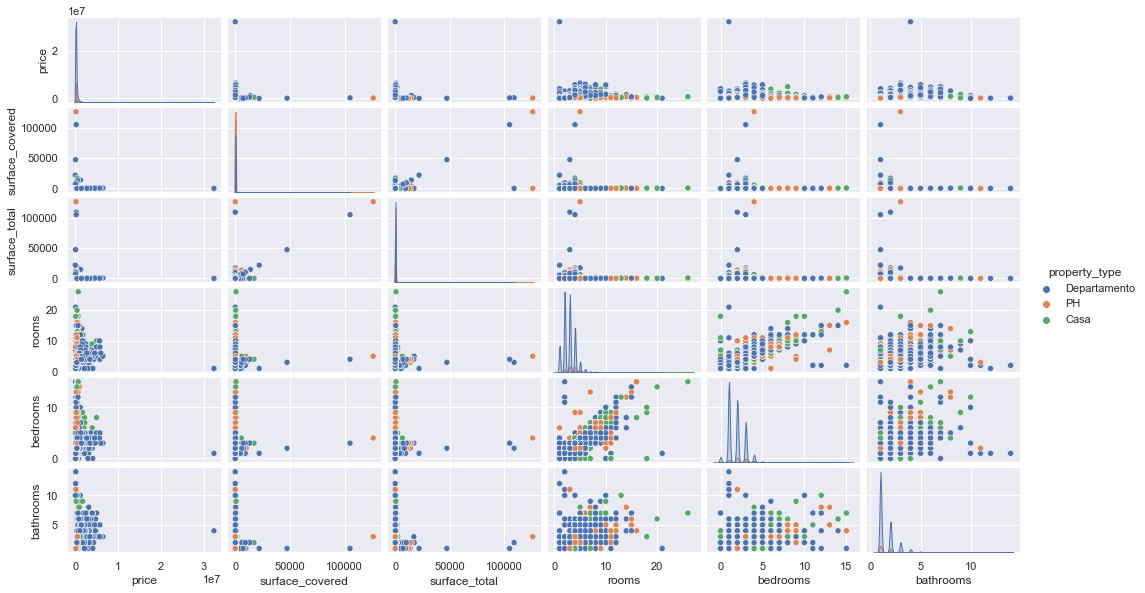

In [14]:
#podemos estudiar la relacion de las variables un pairplot de sns
#creamos una figura
figz= plt.figure()
#agrupamos las variables que deseamos estudiar.
col_prop = ["property_type","price","surface_covered","surface_total","rooms","bedrooms","bathrooms"]
#Sesmentamos por tipo de propiedad con colores hue=
graph=sns.pairplot(df_cf[col_prop],hue="property_type")
#damos tamaño a la figura
graph.fig.set_size_inches(16,8)
plt.grid()
plt.show()

Podemos observar que este grupo de datos tiene una serie outlayers que interfieren con el analisis.
Debemos realizar algunas correcciones para poder tener informacion un tanto mas limpia que nos ayude con el analisis.



In [15]:
#tenemos los datos filtrados de Departamentos, PH y Casas de Capital Feredal.
#creamos una copia de la ultima data
df_cf2 = df_cf[col_prop].copy() 
#ordenamos el idex por el nombre
#Creamos un columna de precios en Miles
df_cf2['price_m']= df_cf2['price']/1000
df_cf2 = df_cf2.reindex(sorted(df_cf2.columns), axis=1) 
df_cf2.head()

,bathrooms,bedrooms,price,price_m,property_type,rooms,surface_covered,surface_total
0,2.0,7.0,153000.0,153.0,Departamento,7.0,140.0,140.0
1,2.0,1.0,159000.0,159.0,PH,2.0,58.0,70.0
2,1.0,1.0,125000.0,125.0,PH,2.0,45.0,45.0
3,1.0,1.0,295000.0,295.0,PH,2.0,50.0,85.0
5,1.0,1.0,150000.0,150.0,PH,2.0,56.0,56.0


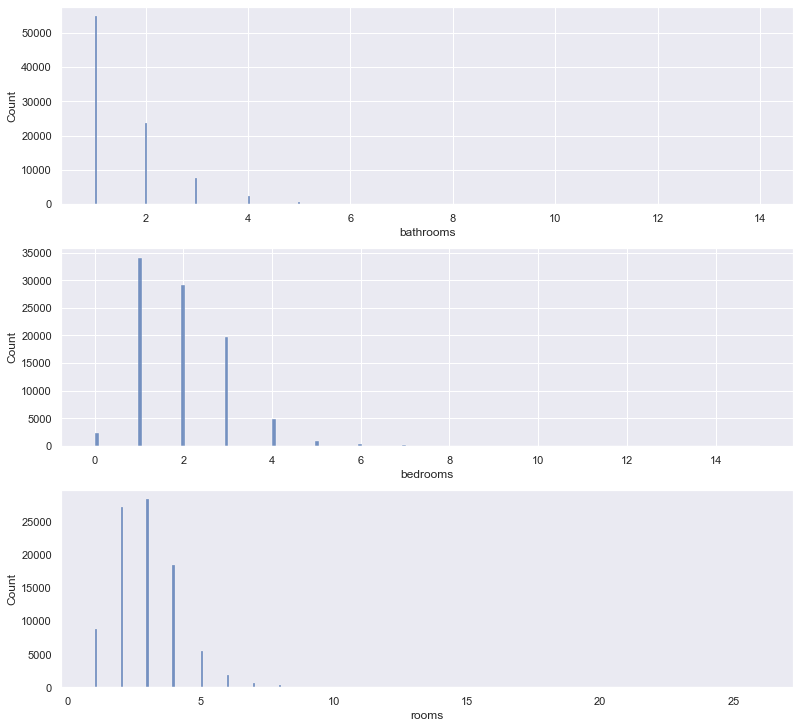

In [27]:
#podemos ver la distribucion de las habitaciones
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(11,10),constrained_layout= True)
sns.histplot(data=df_cf2,x="bathrooms", ax=ax1)
sns.histplot(data=df_cf2,x="bedrooms", ax=ax2)
sns.histplot(data=df_cf2,x="rooms", ax=ax3)
plt.grid()
plt.show()
#notamos que excisten datos que no son relevantes

In [17]:
#una descripcion inivial de los datos nos indica que existe outlaiers que debemos corregir
df_cf2.describe().round(3)

,bathrooms,bedrooms,price,price_m,rooms,surface_covered,surface_total
count,89314.00,91485.000,9.148500e+04,91485.000,91485.000,82250.000,82568.000
mean,1.56,1.960,2.595003e+05,259.500,2.964,94.966,112.626
std,0.86,1.073,3.222654e+05,322.265,1.315,778.515,980.714
min,1.00,0.000,6.000000e+03,6.000,1.000,1.000,10.000
25%,1.00,1.000,1.200000e+05,120.000,2.000,44.000,49.000
50%,1.00,2.000,1.750000e+05,175.000,3.000,63.000,71.000
75%,2.00,3.000,2.790000e+05,279.000,4.000,96.000,111.000
max,14.00,15.000,3.243423e+07,32434.232,26.000,126062.000,126062.000


## revisemos como se distribeyen los datos de las diferentes Rooms

In [19]:
#para poder determinar si elimanremos datos podemos ver su distribucion.
df = pd.DataFrame()
#remplaza la variable a revisar.
var_exp = df_cf2["bathrooms"] #["bathrooms"]/["bedrooms"]/["rooms"]
#Revisa la distribucion de los datos para saber que hacer con los outlayers
df['total'] = var_exp.value_counts()
df['pond'] = (var_exp.value_counts()/var_exp.value_counts().sum()).round(3)
df['cumsum'] = df['pond'].cumsum()
df.sort_values(by= 'pond' ,ascending= False)
#Luego de revisar 

,total,pond,cumsum
1.0,54801,0.614,0.614
2.0,23573,0.264,0.878
3.0,7645,0.086,0.964
4.0,2365,0.026,0.990
5.0,714,0.008,0.998
6.0,154,0.002,1.000
7.0,39,0.000,1.000
10.0,7,0.000,1.000
9.0,5,0.000,1.000
8.0,4,0.000,1.000


In [20]:
#para poder determinar si elimanremos datos podemos ver su distribucion.
df = pd.DataFrame()
#remplaza la variable a revisar.
var_exp = df_cf2["rooms"] #["bathrooms"]/["bedrooms"]/["rooms"]
#Revisa la distribucion de los datos para saber que hacer con los outlayers
df['total'] = var_exp.value_counts()
df['pond'] = (var_exp.value_counts()/var_exp.value_counts().sum()).round(3)
df['cumsum'] = df['pond'].cumsum()
df.sort_values(by= 'pond' ,ascending= False)
#Luego de revisar 

,total,pond,cumsum
3.0,28327,0.310,0.310
2.0,27249,0.298,0.608
4.0,18414,0.201,0.809
1.0,8842,0.097,0.906
5.0,5461,0.060,0.966
6.0,1824,0.020,0.986
7.0,710,0.008,0.994
8.0,405,0.004,0.998
9.0,80,0.001,0.999
10.0,80,0.001,1.000


## Analisis 
Podemos observar que 

- bathroom mayores a 6 son irrelevantes.
- room y bedrooms mayores a 7 son irrelevantes.

Debemos trabajar los datos Outliers


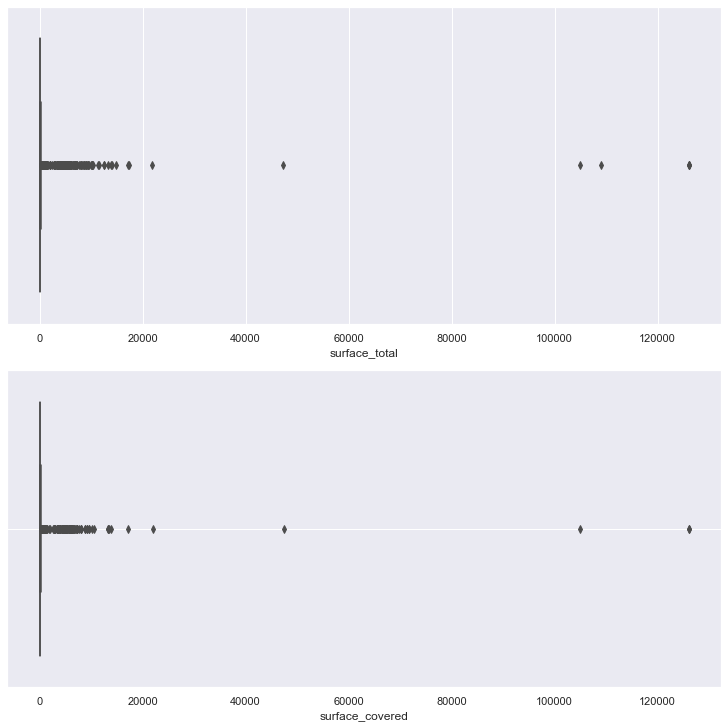

In [21]:
#Una miarada a la superficies.
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10),constrained_layout= True)
sns.boxplot(data=df_cf2,x="surface_total", ax=ax1)
sns.boxplot(data=df_cf2,x="surface_covered", ax=ax2)
plt.grid()
plt.show()


Podemos deducir que los las propiedas con superficies mayores a 20.000 son outliers

In [43]:
#verificamos si las bedrooms iguales a la 0 son mono ambientes o no 
df_cf2[(df_cf2["bedrooms"] == 0) & (df_cf2["rooms"] == 1)].sample(10)

,bathrooms,bedrooms,price,price_m,property_type,rooms,surface_covered,surface_total
86940,1.0,0.0,140000.0,140.000,Departamento,1.0,42.0,42.0
46244,1.0,0.0,112500.0,112.500,Departamento,1.0,28.0,44.0
58122,1.0,0.0,48457.0,48.457,Departamento,1.0,NaN,NaN
63106,NaN,0.0,85000.0,85.000,Departamento,1.0,NaN,NaN
28713,1.0,0.0,78700.0,78.700,Departamento,1.0,NaN,NaN
86941,1.0,0.0,65000.0,65.000,Departamento,1.0,26.0,26.0
57969,1.0,0.0,126500.0,126.500,Departamento,1.0,NaN,NaN
107573,1.0,0.0,145000.0,145.000,Departamento,1.0,38.0,42.0
11342,1.0,0.0,87326.0,87.326,Departamento,1.0,NaN,NaN
115394,1.0,0.0,46663.0,46.663,Departamento,1.0,NaN,NaN


Podemos observar que aquellas propiedades con 0 beedrooms son iquivalentes a un mono-ambiente.

# Limpienado datos outliers

Para un correcto analisis y posterios aplicacion de modelos predictivo es necesario establecer algunos limites a los datos de tal manera asegurar que estos no cuenta con valores que puedan iterferir con los resutados.

Anteriormente se definio los limites de las bariables habitacionales y de superficie asi mismo se determinanara los limites de precio para cada tipo de propiedad.

Para este caso utilizaremos IQR para eliminar datos por presentar mejor rendiemitno que Z-score.

In [139]:
#definimos los valores  unicos para cada propiedad
propiedades= df_cf2['property_type'].unique()

In [140]:
for x in propiedades:
    Q1=df_cf2[df_cf2['property_type']==x]['surface_total'].quantile(0.25)
    Q3=df_cf2[df_cf2['property_type']==x]['surface_total'].quantile(0.75)
    IQR= Q3-Q1
    surface_min = df_cf2[df_cf2["property_type"]==x]["surface_total"].quantile(0.01) #evitar valores negativos
    surface_max = Q3 + (IQR*1.5)
    print(x)
    print('Superficie maxima {}'.format(surface_max))
    print('Superficie minima {}'.format(surface_min))
    print('IQR {}'.format(IQR))
    print('-------------')
 

Departamento
Superficie maxima 177.0
Superficie minima 25.0
IQR 52.0
-------------
PH
Superficie maxima 275.0
Superficie minima 35.0
IQR 82.0
-------------
Casa
Superficie maxima 579.0
Superficie minima 56.0
IQR 166.0
-------------


In [147]:
df_cf3 = df_cf2.copy()
df_cf3.describe()

,bathrooms,bedrooms,price,price_m,rooms,surface_covered,surface_total
count,89314.000000,91485.000000,9.148500e+04,91485.000000,91485.000000,82250.000000,82568.000000
mean,1.560147,1.960278,2.595003e+05,259.500258,2.964278,94.966310,112.626369
std,0.860309,1.072946,3.222654e+05,322.265441,1.314704,778.515243,980.713664
min,1.000000,0.000000,6.000000e+03,6.000000,1.000000,1.000000,10.000000
25%,1.000000,1.000000,1.200000e+05,120.000000,2.000000,44.000000,49.000000
50%,1.000000,2.000000,1.750000e+05,175.000000,3.000000,63.000000,71.000000
75%,2.000000,3.000000,2.790000e+05,279.000000,4.000000,96.000000,111.000000
max,14.000000,15.000000,3.243423e+07,32434.232000,26.000000,126062.000000,126062.000000


In [148]:
Q1= df_cf3.quantile(0.25)
Q3= df_cf3.quantile(0.75)
IQR = Q3-Q1

df_cf4=df_cf3[~((df_cf3<(Q1-1.5*IQR))|(df_cf3>(Q3+1.5*IQR))).any(axis=1)]
df_cf4.describe().round(3)

,bathrooms,bedrooms,price,price_m,rooms,surface_covered,surface_total
count,77909.000,79937.000,79937.000,79937.000,79937.000,71366.000,71657.000
mean,1.360,1.760,185043.502,185.044,2.706,64.572,73.283
std,0.578,0.884,93237.087,93.237,1.033,29.240,35.167
min,1.000,0.000,7500.000,7.500,1.000,1.000,10.000
25%,1.000,1.000,115000.000,115.000,2.000,42.000,47.000
50%,1.000,2.000,160000.000,160.000,3.000,57.000,65.000
75%,2.000,2.000,235000.000,235.000,3.000,80.000,90.000
max,3.000,6.000,517266.000,517.266,7.000,174.000,204.000


7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [18]:
#correlacion de variables numericas
df_cf2.corr().style.background_gradient(cmap='coolwarm').set_precision(4)

,bathrooms,bedrooms,price,price_m,rooms,surface_covered,surface_total
bathrooms,1.0000,0.6040,0.5877,0.5877,0.6032,0.0582,0.0565
bedrooms,0.6040,1.0000,0.4136,0.4136,0.9273,0.0662,0.0645
price,0.5877,0.4136,1.0000,1.0000,0.4483,0.0545,0.0491
price_m,0.5877,0.4136,1.0000,1.0000,0.4483,0.0545,0.0491
rooms,0.6032,0.9273,0.4483,0.4483,1.0000,0.0668,0.0648
surface_covered,0.0582,0.0662,0.0545,0.0545,0.0668,1.0000,0.7707
surface_total,0.0565,0.0645,0.0491,0.0491,0.0648,0.7707,1.0000


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.